_Main topics covered during today's session:_

1. **Floating point numbers/Intro to regex -- Prof. Vuduc class video**
2. **zip, enumerate, and lambda functions -- This NB**



# zip, enumerate, and lambda functions

## zip “pairs up" (or combines) the elements of a number of lists, tuples, or other sequences to create a zip object of tuples.

Let's take a look at our diagram from last week.

We start with two "iterable objects" (on the left). According to the Python documentation, an iterable is any object that can return its members one at a time. This can be a list, dictionary, set, array, series, etc.


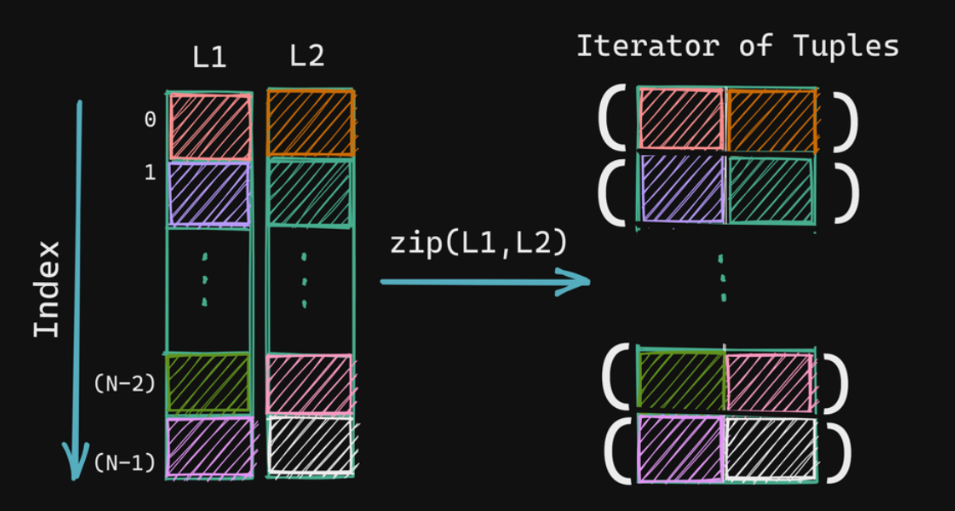

In [1]:
seq1 = ['Albert', 'Chris', 'Jen']
seq2 = ['one', 'two', 'three']
zipped = zip(seq1, seq2)
print(zipped)

# cast the zip object to a list
zip_list = list(zipped)
print(zip_list)

# create the zip list directly
zip_list2 = list(zip(seq1, seq2))
print(zip_list2)

[('Albert', 'one'), ('Chris', 'two'), ('Jen', 'three')]
[('Albert', 'one'), ('Chris', 'two'), ('Jen', 'three')]


Note that we created a new list from the zip object, and that is the normal paradigm that we will use the zip function. We won't work with the zip object directly, but instead we will cast it to some other iterable object that we want to use (list, dict, etc).

To create a dictionary using zip, we have to iterate over the zip object and tell Python which item in each tuple is to be the key and which is to be the value.

In [2]:
from collections import defaultdict

zip_dict=defaultdict()
zip_dict = {name: number for name, number in zip(seq1, seq2)}
print(zip_dict)

zip_dict_reversed = defaultdict()
zip_dict_reversed = {number: name for name, number in zip(seq1, seq2)}
print(zip_dict_reversed)

{'Albert': 'one', 'Chris': 'two', 'Jen': 'three'}
{'one': 'Albert', 'two': 'Chris', 'three': 'Jen'}


zip can take an arbitrary number of sequences, and the number of elements it produces is determined by the shortest sequence.

See below that seq1 and seq2 have 3 elements, but seq3 has only 2 elements, so the resulting list also has only 2 elements.

In [ ]:
# unequal length lists, note also that we are also zipping up 3 iterables
seq3 = [False, True]
zip_list = list(zip(seq1, seq2, seq3))
zip_list

## enumerate

#### In Python, a for loop is usually written as a loop over an iterable object. This means you don’t need a counting variable to access items in the iterable. 

#### Sometimes, though, you do want to have a variable that changes on each loop iteration. Rather than creating and incrementing a variable yourself, you can use Python’s enumerate() to get a counter and the value from the iterable at the same time.

In [ ]:
index = 0
for value in seq1:
    # do something with value
    print(index, value)
    index += 1

enumerate returns a sequence of (i, value) tuples:

In [ ]:
for index, value in enumerate(seq1):
    # index is the counter that enumerate returns
    # value is from seq1, which is passed in
    print(index, value)

In [ ]:
# for example create a list of the tuples
enum_list = []
for index, value in enumerate(seq1):
    # create a tuple and append the tuple to the list
    enum_list.append((index,value))
    
enum_list

In [ ]:
# for example create a dictionary of the tuples
enum_default_dict = defaultdict()
for index, value in enumerate(seq1):
    enum_default_dict[index] = value 
print(enum_default_dict)

enum_dict = dict(enum_default_dict)
print(enum_dict)

#### Good enumerate reference:

https://realpython.com/python-enumerate/

So by now, you should be thinking about how can we use zip and enumerate together? 

A common use of zip is simultaneously iterating over multiple sequences, possibly also combined with enumerate:

In [ ]:
# a simple example
seq1 = ['Albert', 'Chris', 'Jen']
seq2 = ['one', 'two', 'three']

zip_enumerate_list = []
zip_enumerate_dict = defaultdict()

for i, (a, b) in enumerate(zip(seq1, seq2)):
    print('{0}: {1}, {2}'.format(i, a, b))
    zip_enumerate_list.append((i,a,b))
    zip_enumerate_dict[i]=(a,b)

print('\n')
print(zip_enumerate_list,'\n')
print(zip_enumerate_dict,'\n')
print(dict(zip_enumerate_dict))

## lambda functions (aka anonymous functions)

Python has support for so-called anonymous or lambda functions, which are a way of writing functions consisting of a single statement, the result of which is the return value. They are defined with the lambda keyword, which has no meaning other than “we are declaring an anonymous function”:

In [ ]:
def multiply_function(x):
   return x * 2

print(multiply_function(2))

equivalent_lambda = lambda x: x * 2
print(equivalent_lambda(2))

#### The lambda syntax is interpreted as follows:

Take the variable passed in before the semi-colon, and apply the function after the semi-colon to it.

***********************************************************************************

Lambda funcations are especially convenient in data analysis because there are many cases where data transformation functions will take functions as arguments. 

It is often less typing (and clearer) to pass a lambda function as opposed to writing a full-out function declaration or even assigning the lambda function to a local variable. 

So let's look at an example.

In [ ]:
def apply_to_list(some_list, f):
    return [f(x) for x in some_list]

ints = [1, 2, 3, 4, 5]

# assign lambda function to variable that is passed in
apply_to_list(ints, lambda x: x * 2)

Now let's use the lambda function with list comprehension.

In [ ]:
even_list = [lambda arg=x: arg * 2 for x in range(1, 6)]

# iterate on each lambda function
# and invoke the function to get the calculated value
for item in even_list:
    print(item)  # the lambda function object
    print(item())  # call the lambda function object to execute

On each iteration inside the list comprehension, we are creating a new lambda function with default argument of x (where x is the current item in the iteration). 

Later, inside the for loop, we are calling the same function object having the default argument using item() and getting the desired value. 

As we can see, even_list stores the list of lambda function objects.

### Here are three good references on lamba:

https://realpython.com/python-lambda/

https://www.w3schools.com/python/python_lambda.asp

https://www.geeksforgeeks.org/python-lambda-anonymous-functions-filter-map-reduce/

### A final comment.

#### These are three excellent functions which you should be familiar with. Not only in the sense of how to write the syntax for these functions, but more so in the application of them (when to use them). 

#### You will see many instances, both in this course and in "real life" data analysis, in which the requirement points you to use one of these functions. This will be especially true on the exams here (HINT HINT!!).

The Wes McKinney book, "Python for Data Analysis", has a very good chapter on many built-in Python functions and data structures, and it is also worth a look to review. 

https://wesmckinney.com/book/python-builtin.html

McKinney has his code posted in Github, organized by chapter:

https://github.com/wesm/pydata-book/tree/3rd-edition